Importing the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from google.colab import drive
from datetime import datetime
import statsmodels.api as sm
from scipy.stats import norm
import scipy.stats as stats
from scipy.stats import spearmanr
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from scipy.stats import chi2_contingency
from sklearn.preprocessing import scale
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from numpy import mean
from numpy import std
from numpy import absolute
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, r2_score
from numpy import arange
from sklearn.linear_model import ElasticNetCV

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')
df=pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Project 2 Sigma/ubervslyft.csv')

Mounted at /content/gdrive


In [ ]:
df.head()

id     timestamp  hour  day  month  \
0  424553bb-7174-41ea-aeb4-fe06d4f4b9d7  1.544953e+09     9   16     12   
1  4bd23055-6827-41c6-b23b-3c491f24e74d  1.543284e+09     2   27     11   
2  981a3613-77af-4620-a42a-0c0866077d1e  1.543367e+09     1   28     11   
3  c2d88af2-d278-4bfd-a8d0-29ca77cc5512  1.543554e+09     4   30     11   
4  e0126e1f-8ca9-4f2e-82b3-50505a09db9a  1.543463e+09     3   29     11   

              datetime          timezone            source    destination  \
0  2018-12-16 09:30:07  America/New_York  Haymarket Square  North Station   
1  2018-11-27 02:00:23  America/New_York  Haymarket Square  North Station   
2  2018-11-28 01:00:22  America/New_York  Haymarket Square  North Station   
3  2018-11-30 04:53:02  America/New_York  Haymarket Square  North Station   
4  2018-11-29 03:49:20  America/New_York  Haymarket Square  North Station   

  cab_type  ... precipIntensityMax uvIndexTime  temperatureMin  \
0     Lyft  ...             0.1276  1544979600           39.89   
1     Lyft  ...             0.1300  1543251600           40.49   
2     Lyft  ...             0.1064  1543338000           35.36   
3     Lyft  ...             0.0000  1543507200           34.67   
4     Lyft  ...             0.0001  1543420800           33.10   

   temperatureMinTime  temperatureMax  temperatureMaxTime  \
0          1545012000           43.68          1544968800   
1          1543233600           47.30          1543251600   
2          1543377600           47.55          1543320000   
3          1543550400           45.03          1543510800   
4          1543402800           42.18          1543420800   

   apparentTemperatureMin  apparentTemperatureMinTime  apparentTemperatureMax  \
0                   33.73                  1545012000                   38.07   
1                   36.20                  1543291200                   43.92   
2                   31.04                  1543377600                   44.12   
3                   30.30                  1543550400                   38.53   
4                   29.11                  1543392000                   35.75   

  apparentTemperatureMaxTime  
0                 1544958000  
1                 1543251600  
2                 1543320000  
3                 1543510800  
4                 1543420800  

[5 rows x 57 columns]

In [ ]:
df.shape

(693071, 57)

In [ ]:
df.describe()

timestamp           hour            day          month  \
count  6.930710e+05  693071.000000  693071.000000  693071.000000   
mean   1.544046e+09      11.619137      17.794365      11.586684   
std    6.891925e+05       6.948114       9.982286       0.492429   
min    1.543204e+09       0.000000       1.000000      11.000000   
25%    1.543444e+09       6.000000      13.000000      11.000000   
50%    1.543737e+09      12.000000      17.000000      12.000000   
75%    1.544828e+09      18.000000      28.000000      12.000000   
max    1.545161e+09      23.000000      30.000000      12.000000   

               price       distance  surge_multiplier       latitude  \
count  637976.000000  693071.000000     693071.000000  693071.000000   
mean       16.545125       2.189430          1.013870      42.338172   
std         9.324359       1.138937          0.091641       0.047840   
min         2.500000       0.020000          1.000000      42.214800   
25%         9.000000       1.280000          1.000000      42.350300   
50%        13.500000       2.160000          1.000000      42.351900   
75%        22.500000       2.920000          1.000000      42.364700   
max        97.500000       7.860000          3.000000      42.366100   

           longitude    temperature  ...  precipIntensityMax   uvIndexTime  \
count  693071.000000  693071.000000  ...       693071.000000  6.930710e+05   
mean      -71.066151      39.584388  ...            0.037374  1.544044e+09   
std         0.020302       6.726084  ...            0.055214  6.912028e+05   
min       -71.105400      18.910000  ...            0.000000  1.543162e+09   
25%       -71.081000      36.450000  ...            0.000000  1.543421e+09   
50%       -71.063100      40.490000  ...            0.000400  1.543770e+09   
75%       -71.054200      43.580000  ...            0.091600  1.544807e+09   
max       -71.033000      57.220000  ...            0.145900  1.545152e+09   

       temperatureMin  temperatureMinTime  temperatureMax  temperatureMaxTime  \
count   693071.000000        6.930710e+05   693071.000000        6.930710e+05   
mean        33.457774        1.544042e+09       45.261313        1.544047e+09   
std          6.467224        6.901954e+05        5.645046        6.901353e+05   
min         15.630000        1.543122e+09       33.510000        1.543154e+09   
25%         30.170000        1.543399e+09       42.570000        1.543439e+09   
50%         34.240000        1.543727e+09       44.680000        1.543788e+09   
75%         38.880000        1.544789e+09       46.910000        1.544814e+09   
max         43.100000        1.545192e+09       57.870000        1.545109e+09   

       apparentTemperatureMin  apparentTemperatureMinTime  \
count           693071.000000                6.930710e+05   
mean                29.731002                1.544048e+09   
std                  7.110494                6.871862e+05   
min                 11.810000                1.543136e+09   
25%                 27.760000                1.543399e+09   
50%                 30.130000                1.543745e+09   
75%                 35.710000                1.544789e+09   
max                 40.050000                1.545134e+09   

       apparentTemperatureMax  apparentTemperatureMaxTime  
count           693071.000000                6.930710e+05  
mean                41.997343                1.544048e+09  
std                  6.936841                6.910777e+05  
min                 28.950000                1.543187e+09  
25%                 36.570000                1.543439e+09  
50%                 40.950000                1.543788e+09  
75%                 44.120000                1.544818e+09  
max                 57.200000                1.545109e+09  

[8 rows x 46 columns]

### **DATA CLEANING**

Removing the id and the long summary feature since they play no role in our analysis

In [ ]:
df.drop(['id','long_summary'],axis = 1,inplace = True)

In [ ]:
df.drop('product_id',axis = 1,inplace = True)

Converting timestamps to date time format

In [ ]:
from datetime import datetime
def to_DateTime(timestamp):
  return datetime.fromtimestamp(timestamp)

pd.DataFrame(df['timestamp'].apply(to_DateTime))

timestamp
0      2018-12-16 09:30:07.890
1      2018-11-27 02:00:23.677
2      2018-11-28 01:00:22.198
3      2018-11-30 04:53:02.749
4      2018-11-29 03:49:20.223
...                        ...
693066 2018-12-01 23:53:06.000
693067 2018-12-01 23:53:06.000
693068 2018-12-01 23:53:06.000
693069 2018-12-01 23:53:06.000
693070 2018-12-01 23:53:06.000

[693071 rows x 1 columns]

In [ ]:
df['timestamp'] = df['timestamp'].apply(to_DateTime)

In [ ]:
df.timestamp.head()

0   2018-12-16 09:30:07.890
1   2018-11-27 02:00:23.677
2   2018-11-28 01:00:22.198
3   2018-11-30 04:53:02.749
4   2018-11-29 03:49:20.223
Name: timestamp, dtype: datetime64[ns]

We can see that timestamp, datetime match with the hour, day and month columns, therefore we can remove both timestamp and datetime columns after extracting the minutes data from it

In [ ]:
from datetime import datetime
def extractMinutes(date):
  Minute = date.strftime("%M")
  return Minute

In [ ]:
df['minute'] = df['timestamp'].apply(extractMinutes)

In [ ]:
df.drop('datetime',axis = 1,inplace = True)

**Handling Missing Values**

In [ ]:
df[df['price'].isna()]['name'].value_counts() #dropping one column of uber as we dont have enough info about it
df.dropna(inplace=True)
df

timestamp  hour  day  month          timezone  \
0      2018-12-16 09:30:07.890     9   16     12  America/New_York   
1      2018-11-27 02:00:23.677     2   27     11  America/New_York   
2      2018-11-28 01:00:22.198     1   28     11  America/New_York   
3      2018-11-30 04:53:02.749     4   30     11  America/New_York   
4      2018-11-29 03:49:20.223     3   29     11  America/New_York   
...                        ...   ...  ...    ...               ...   
693065 2018-12-01 23:53:06.000    23    1     12  America/New_York   
693066 2018-12-01 23:53:06.000    23    1     12  America/New_York   
693067 2018-12-01 23:53:06.000    23    1     12  America/New_York   
693069 2018-12-01 23:53:06.000    23    1     12  America/New_York   
693070 2018-12-01 23:53:06.000    23    1     12  America/New_York   

                  source    destination cab_type          name  price  ...  \
0       Haymarket Square  North Station     Lyft        Shared    5.0  ...   
1       Haymarket Square  North Station     Lyft           Lux   11.0  ...   
2       Haymarket Square  North Station     Lyft          Lyft    7.0  ...   
3       Haymarket Square  North Station     Lyft  Lux Black XL   26.0  ...   
4       Haymarket Square  North Station     Lyft       Lyft XL    9.0  ...   
...                  ...            ...      ...           ...    ...  ...   
693065          West End      North End     Uber           WAV    9.5  ...   
693066          West End      North End     Uber        UberXL   13.0  ...   
693067          West End      North End     Uber         UberX    9.5  ...   
693069          West End      North End     Uber     Black SUV   27.0  ...   
693070          West End      North End     Uber      UberPool   10.0  ...   

        uvIndexTime  temperatureMin  temperatureMinTime  temperatureMax  \
0        1544979600           39.89          1545012000           43.68   
1        1543251600           40.49          1543233600           47.30   
2        1543338000           35.36          1543377600           47.55   
3        1543507200           34.67          1543550400           45.03   
4        1543420800           33.10          1543402800           42.18   
...             ...             ...                 ...             ...   
693065   1543683600           31.42          1543658400           44.76   
693066   1543683600           31.42          1543658400           44.76   
693067   1543683600           31.42          1543658400           44.76   
693069   1543683600           31.42          1543658400           44.76   
693070   1543683600           31.42          1543658400           44.76   

        temperatureMaxTime  apparentTemperatureMin apparentTemperatureMinTime  \
0               1544968800                   33.73                 1545012000   
1               1543251600                   36.20                 1543291200   
2               1543320000                   31.04                 1543377600   
3               1543510800                   30.30                 1543550400   
4               1543420800                   29.11                 1543392000   
...                    ...                     ...                        ...   
693065          1543690800                   27.77                 1543658400   
693066          1543690800                   27.77                 1543658400   
693067          1543690800                   27.77                 1543658400   
693069          1543690800                   27.77                 1543658400   
693070          1543690800                   27.77                 1543658400   

        apparentTemperatureMax  apparentTemperatureMaxTime  minute  
0                        38.07                  1544958000      30  
1                        43.92                  1543251600      00  
2                        44.12                  1543320000      00  
3                        38.53                  1543510800      53  
4                       

# EDA
Number of cabs of Uber vs Lyft and their average price

In [ ]:
temp=df.groupby(by=['cab_type']).agg({'name':['count'],'price':['mean']})
temp=temp.sort_values([('name', 'count')], ascending=False)
temp

name      price
           count       mean
cab_type                   
Uber      330568  15.795343
Lyft      307408  17.351396

Checking average price, distance and temperature for various types of cabs

In [ ]:
pd.DataFrame(df.groupby(['name'])[['distance','price','temperature']].mean())

distance      price  temperature
name                                          
Black         2.191399  20.523786    39.572789
Black SUV     2.191378  30.286763    39.611172
Lux           2.186968  17.771240    39.594439
Lux Black     2.186968  23.062468    39.564552
Lux Black XL  2.186968  32.324086    39.608878
Lyft          2.186968   9.610885    39.605775
Lyft XL       2.186968  15.309363    39.609421
Shared        2.187012   6.029893    39.595241
UberPool      2.191396   8.752500    39.574898
UberX         2.191390   9.765074    39.539406
UberXL        2.191378  15.678144    39.546516
WAV           2.191378   9.765019    39.571663

Checking timezones

In [ ]:
df['timezone'].value_counts()

America/New_York    637976
Name: timezone, dtype: int64

Since their is no variation in this therefore we can remove it

In [ ]:
df.drop('timezone',axis=1,inplace=True)

In [ ]:
fig=px.bar(x=temp[('name','count')],y=temp.index,title="Total number of cabs of Uber vs Lyft",text_auto=True,color=temp[('price', 'mean')], labels={
                     "y": "Cab",
                     "x": "Total Count", "color":"Average price of cab"
                     })
fig.show()

Total number of each cab types and their average price

In [ ]:
temp=df.groupby(by=['name']).agg({'name':['count'],'price':['mean']})
temp=temp.sort_values([('price', 'mean')], ascending=False)
temp

name      price
              count       mean
name                          
Lux Black XL  51235  32.324086
Black SUV     55096  30.286763
Lux Black     51235  23.062468
Black         55095  20.523786
Lux           51235  17.771240
UberXL        55096  15.678144
Lyft XL       51235  15.309363
UberX         55094   9.765074
WAV           55096   9.765019
Lyft          51235   9.610885
UberPool      55091   8.752500
Shared        51233   6.029893

In [ ]:
fig=px.bar(x=temp[('price','mean')],y=temp.index,title="Total number of each cab types and their average price",text_auto=True,color=temp[('name', 'count')],labels={
                     "y": "Cab Type",
                     "x": "Average Price", "color":"Number of cabs"
                     })
fig.show()

Maximum price of each of the cab types

In [ ]:
temp=df.groupby(by=['name']).agg({'price':['max'],'cab_type':['max']})
temp=temp.sort_values([('price', 'max')], ascending=False)
temp

price cab_type
               max      max
name                       
Lux Black XL  97.5     Lyft
Black SUV     89.5     Uber
UberXL        76.0     Uber
Lux Black     75.0     Lyft
Black         68.5     Uber
Lyft XL       65.0     Lyft
Lux           55.0     Lyft
UberX         44.0     Uber
WAV           44.0     Uber
UberPool      42.5     Uber
Lyft          38.5     Lyft
Shared        22.5     Lyft

In [ ]:
fig=px.line(x=temp.index,y=temp[('price','max')],color=temp[('cab_type','max')],
                  title='Maximum price of each of the cab types',labels={
    'x':'Cab Type',
    'y':'Price',
    'color':'Cab'

})
fig.show()

Total number of cabs and their average price from different sources

In [ ]:
temp=df.groupby(by=['source']).agg({'name':['count'],'price':['mean']})
temp=temp.sort_values([('price', 'mean')], ascending=False)
temp

name      price
                         count       mean
source                                   
Boston University        53172  18.853034
Fenway                   53166  18.379491
Financial District       54197  18.181372
Northeastern University  53164  17.901124
Theatre District         53201  16.596994
North Station            52576  16.364006
West End                 52980  16.108498
Back Bay                 53201  16.047394
South Station            53160  15.672479
Beacon Hill              52841  15.664030
North End                53171  15.153373
Haymarket Square         53147  13.578114

In [ ]:
fig=px.bar(x=temp[('price','mean')],y=temp.index,title="Total number of cabs and their average price from different sources",text_auto=True,color=temp[('name', 'count')],labels={
                     "y": "Source",
                     "x": "Average Price",  "color": "Number of cabs",
                     })
fig.show()

Maximum prices from different sources

In [ ]:
temp=df.groupby(by=['source']).agg({'cab_type':['max'],'price':['max']})
temp=temp.sort_values([('price', 'max')], ascending=False)
temp

cab_type price
                             max   max
source                                
Financial District          Uber  97.5
Boston University           Uber  92.0
Fenway                      Uber  92.0
Theatre District            Uber  89.0
North Station               Uber  80.5
Northeastern University     Uber  80.5
Back Bay                    Uber  75.0
South Station               Uber  75.0
West End                    Uber  68.5
North End                   Uber  67.0
Beacon Hill                 Uber  62.5
Haymarket Square            Uber  61.5

In [ ]:
fig=px.line(x=temp.index,y=temp[('price','max')],color=temp[('cab_type','max')],
                  title='Maximum price of cabs from different source',labels={
    'x':'Source',
    'y':'Price',
    'color':'Cab'

})
fig.show()

Total number of cabs and their average price to different destinations

In [ ]:
temp=df.groupby(by=['destination']).agg({'name':['count'],'price':'mean'})
temp=temp.sort_values([('price', 'mean')], ascending=False)
temp

name      price
                         count       mean
destination                              
Boston University        53171  18.942137
Fenway                   53166  18.146419
Financial District       54192  18.046280
Northeastern University  53165  17.827517
North Station            52577  16.805238
Beacon Hill              52840  16.248335
West End                 52992  16.225843
Back Bay                 53190  16.210152
Theatre District         53189  15.974450
North End                53164  15.002210
South Station            53159  14.828549
Haymarket Square         53171  14.255553

In [ ]:
fig=px.bar(x=temp[('price','mean')],y=temp.index,title="Total number of cabs and their average price to different destinations",text_auto=True,color=temp[('name', 'count')],labels={
                     "y": "Destination",
                     "x": "Average Prices", "color": "Number of cabs"
                     })
fig.show()

Maximum price of cabs to different destinations

In [ ]:
temp=df.groupby(by=['destination']).agg({'cab_type':['max'],'price':['max']})
temp=temp.sort_values([('price', 'max')], ascending=False)
temp

cab_type price
                             max   max
destination                           
Fenway                      Uber  97.5
Boston University           Uber  92.0
Financial District          Uber  92.0
Northeastern University     Uber  89.5
North Station               Uber  80.5
West End                    Uber  80.0
Back Bay                    Uber  75.0
North End                   Uber  75.0
Theatre District            Uber  75.0
South Station               Uber  68.0
Haymarket Square            Uber  67.5
Beacon Hill                 Uber  65.0

In [ ]:
fig=px.line(x=temp.index,y=temp[('price','max')],color=temp[('cab_type','max')],
                  title='Maximum price of cabs to different destinations',labels={
    'x':'Destination',
    'y':'Price',
    'color':'Cab'

})
fig.show()

In [ ]:
df['month'] = df['month'].map({11:"November",12:"December"}) #Replacing the values of month column

Maximum price of each cab type in a particular month

In [ ]:
temp=df.groupby(by=[ 'month','name','cab_type']).agg({'price':['max']}).reset_index()
temp=temp.sort_values([('price', 'max')], ascending=False)
temp

month          name cab_type price
                                      max
4   December  Lux Black XL     Lyft  97.5
16  November  Lux Black XL     Lyft  92.0
13  November     Black SUV     Uber  89.5
1   December     Black SUV     Uber  87.0
22  November        UberXL     Uber  76.0
3   December     Lux Black     Lyft  75.0
15  November     Lux Black     Lyft  75.0
0   December         Black     Uber  68.5
10  December        UberXL     Uber  68.5
18  November       Lyft XL     Lyft  65.0
12  November         Black     Uber  64.5
6   December       Lyft XL     Lyft  57.5
14  November           Lux     Lyft  55.0
2   December           Lux     Lyft  55.0
11  December           WAV     Uber  44.0
9   December         UberX     Uber  44.0
20  November      UberPool     Uber  42.5
8   December      UberPool     Uber  40.0
5   December          Lyft     Lyft  38.5
17  November          Lyft     Lyft  34.0
21  November         UberX     Uber  32.0
23  November           WAV     Uber  32.0
7   December        Shared     Lyft  22.5
19  November        Shared     Lyft  22.5

In [ ]:
fig=px.bar(y=temp['month'],x=temp[('price','max')],title='Maximum price of each cab type in a particular month',text_auto=True,color=temp[('name')],labels={
    'y':'Month',
    'x':'Price',
    'color':'Cab_type'})
fig.show()

Average price of each cab type in a particular month

In [ ]:
temp=df.groupby(by=[ 'month','name','cab_type']).agg({'price':['mean']}).reset_index()
temp=temp.sort_values([('price', 'mean')], ascending=False)
temp

month          name cab_type      price
                                          mean
16  November  Lux Black XL     Lyft  32.344744
4   December  Lux Black XL     Lyft  32.309631
1   December     Black SUV     Uber  30.295600
13  November     Black SUV     Uber  30.274271
3   December     Lux Black     Lyft  23.094370
15  November     Lux Black     Lyft  23.016905
0   December         Black     Uber  20.532944
12  November         Black     Uber  20.510827
2   December           Lux     Lyft  17.811875
14  November           Lux     Lyft  17.713852
10  December        UberXL     Uber  15.682557
22  November        UberXL     Uber  15.671951
6   December       Lyft XL     Lyft  15.330393
18  November       Lyft XL     Lyft  15.279620
23  November           WAV     Uber   9.785401
21  November         UberX     Uber   9.782600
9   December         UberX     Uber   9.752829
11  December           WAV     Uber   9.750604
5   December          Lyft     Lyft   9.622468
17  November          Lyft     Lyft   9.594418
20  November      UberPool     Uber   8.760332
8   December      UberPool     Uber   8.746973
7   December        Shared     Lyft   6.037036
19  November        Shared     Lyft   6.019703

In [ ]:
fig=px.bar(y=temp['month'],x=temp[('price','mean')],title='Average price of each cab type in a particular month',text_auto=True,color=temp[('name')],labels={
    'y':'Month',
    'x':'Price',
    'color':'Cab_type'})
fig.show()

Total number of each cab types in a particular month

In [ ]:
temp =df.groupby(by=["month",'name']).size().reset_index(name="counts")
temp

month          name  counts
0   December         Black   32282
1   December     Black SUV   32270
2   December           Lux   29996
3   December     Lux Black   30135
4   December  Lux Black XL   30143
5   December          Lyft   30077
6   December       Lyft XL   30013
7   December        Shared   30119
8   December      UberPool   32297
9   December         UberX   32433
10  December        UberXL   32168
11  December           WAV   32272
12  November         Black   22813
13  November     Black SUV   22826
14  November           Lux   21239
15  November     Lux Black   21100
16  November  Lux Black XL   21092
17  November          Lyft   21158
18  November       Lyft XL   21222
19  November        Shared   21114
20  November      UberPool   22794
21  November         UberX   22661
22  November        UberXL   22928
23  November           WAV   22824

In [ ]:
fig=px.bar(y=temp['month'],x=temp['counts'],
                     title='Total number of each cab types in a particular month',text_auto=True,color=temp[('name')],labels={
    'x':'Total number of cabs',
    'y':'Month',
    'color':'Cab Type'

})
fig.show()

Total number of each cab types in a particular day of a month

In [ ]:
temp =df.groupby(by=["day","cab_type","month"]).size().reset_index(name="counts")
temp

day cab_type     month  counts
0     1     Lyft  December   20289
1     1     Uber  December   21391
2     2     Lyft  December   19845
3     2     Uber  December   21453
4     3     Lyft  December   20021
5     3     Uber  December   21302
6     4     Lyft  December    5704
7     4     Uber  December    5923
8     9     Lyft  December     668
9     9     Uber  December     861
10   10     Lyft  December    1212
11   10     Uber  December    1322
12   13     Lyft  December   17005
13   13     Uber  December   18491
14   14     Lyft  December   20151
15   14     Uber  December   21193
16   15     Lyft  December   19906
17   15     Uber  December   21426
18   16     Lyft  December   20039
19   16     Uber  December   21320
20   17     Lyft  December   19685
21   17     Uber  December   21669
22   18     Lyft  December   15958
23   18     Uber  December   17371
24   26     Lyft  November   14000
25   26     Uber  November   15028
26   27     Lyft  November   33755
27   27     Uber  November   36380
28   28     Lyft  November   32791
29   28     Uber  November   35051
30   29     Lyft  November   26466
31   29     Uber  November   28756
32   30     Lyft  November   19913
33   30     Uber  November   21631

In [ ]:
fig= px.bar(data_frame=temp, x="day", y="counts",title="Total number of each cab types in a particular day of a month", pattern_shape="cab_type", pattern_shape_sequence=[".", "x"],color="month",labels={'day':'Day','counts':'Total Number of cabs'})
fig.show()

Total distance travelled by cabs from a particular source

In [ ]:
temp=df.groupby(by=[ 'source','cab_type']).agg({'cab_type':['count'],'distance':'sum'}).reset_index()
temp=temp.sort_values([('distance', 'sum')], ascending=False)
temp

source cab_type         distance
                                      count       sum
5         Boston University     Uber  27552  83815.92
4         Boston University     Lyft  25620  78420.12
9        Financial District     Uber  27960  78009.48
17  Northeastern University     Uber  27550  77134.62
7                    Fenway     Uber  27546  77118.18
6                    Fenway     Lyft  25620  72359.04
8        Financial District     Lyft  26237  68773.15
16  Northeastern University     Lyft  25614  67622.88
15            North Station     Uber  27250  59590.86
1                  Back Bay     Uber  27546  59512.68
23                 West End     Uber  27492  58615.68
20         Theatre District     Lyft  25530  57671.82
14            North Station     Lyft  25326  57067.32
3               Beacon Hill     Uber  27377  55145.92
22                 West End     Lyft  25488  54299.10
2               Beacon Hill     Lyft  25464  52401.18
19            South Station     Uber  27540  52184.28
21         Theatre District     Uber  27671  50108.00
0                  Back Bay     Lyft  25655  45921.86
18            South Station     Lyft  25620  45739.68
13                North End     Uber  27551  43325.45
12                North End     Lyft  25620  42318.84
11         Haymarket Square     Uber  27533  29841.18
10         Haymarket Square     Lyft  25614  29698.80

In [ ]:
fig=px.bar(x=temp[('distance','sum')],y=temp['source'],title="Total distance travelled by cabs from a particular source(left:Uber,right:Lyft)",text_auto=True,color=temp[('cab_type', 'count')],labels={
                     "x": "Distance(in miles)",
                     "y": "Source","color":"Total number of cabs"
                     })

fig.show()

Maximum distance travelled by cabs from different sources

In [ ]:
temp=df.groupby(by=[ 'source','cab_type']).agg({'price':['max'],'distance':'max'}).reset_index()
temp=temp.sort_values([('distance', 'max')], ascending=False)
temp

source cab_type price distance
                                       max      max
17  Northeastern University     Uber  59.0     7.86
7                    Fenway     Uber  76.0     7.62
9        Financial District     Uber  89.5     7.46
1                  Back Bay     Uber  65.0     7.38
5         Boston University     Uber  62.0     7.25
8        Financial District     Lyft  97.5     6.33
6                    Fenway     Lyft  92.0     5.86
21         Theatre District     Uber  76.0     5.46
16  Northeastern University     Lyft  80.5     5.38
20         Theatre District     Lyft  89.0     5.05
4         Boston University     Lyft  92.0     4.81
0                  Back Bay     Lyft  75.0     4.37
18            South Station     Lyft  75.0     3.97
23                 West End     Uber  68.5     3.89
13                North End     Uber  67.0     3.81
11         Haymarket Square     Uber  61.5     3.80
12                North End     Lyft  55.0     3.73
15            North Station     Uber  80.5     3.66
19            South Station     Uber  55.0     3.58
14            North Station     Lyft  67.5     3.54
22                 West End     Lyft  67.5     3.49
10         Haymarket Square     Lyft  47.5     3.42
3               Beacon Hill     Uber  58.5     3.01
2               Beacon Hill     Lyft  62.5     2.69

In [ ]:
fig=px.bar(x=temp[('distance','max')],y=temp['source'],title="Max distance travelled by cabs from different sources(left:Uber,right:Lyft)",text_auto=True,color=temp[('price', 'max')],labels={
                     "x": "Max distance(in miles)",
                     "y": "Source","color":"Max price"
                     })
fig.show()

Total distance travelled by cabs to a particular destination

In [ ]:
temp=df.groupby(by=[ 'destination','cab_type']).agg({'cab_type':['count'],'distance':'sum'}).reset_index()
temp=temp.sort_values([('distance', 'sum')], ascending=False)
temp

destination cab_type         distance
                                      count       sum
4         Boston University     Lyft  25614  81336.54
5         Boston University     Uber  27557  79426.82
7                    Fenway     Uber  27546  76875.78
6                    Fenway     Lyft  25620  75517.74
9        Financial District     Uber  27954  73817.40
17  Northeastern University     Uber  27546  73252.44
16  Northeastern University     Lyft  25619  67137.92
8        Financial District     Lyft  26238  66254.88
3               Beacon Hill     Uber  27376  61128.00
15            North Station     Uber  27251  59929.49
23                 West End     Uber  27498  58183.20
1                  Back Bay     Uber  27540  57797.34
14            North Station     Lyft  25326  57132.42
2               Beacon Hill     Lyft  25464  55879.74
22                 West End     Lyft  25494  53960.58
0                  Back Bay     Lyft  25650  53103.90
21         Theatre District     Uber  27653  52564.20
20         Theatre District     Lyft  25536  49827.84
19            South Station     Uber  27539  49390.66
13                North End     Uber  27550  45628.74
12                North End     Lyft  25614  41448.36
11         Haymarket Square     Uber  27558  36408.18
18            South Station     Lyft  25620  36323.34
10         Haymarket Square     Lyft  25613  34370.53

In [ ]:
fig=px.bar(x=temp[('distance','sum')],y=temp['destination'],title="Total distance travelled by cabs to a particular destination(left:Uber,right:Lyft)",text_auto=True,color=temp[('cab_type', 'count')],labels={
                     "x": "Distance(in miles)",
                     "y": "Source","color":"Total number of cabs"
                     })

fig.show()

Maximum distance travelled by cabs to a particular destination

In [ ]:
temp=df.groupby(by=[ 'destination','cab_type']).agg({'price':['max'],'distance':'max'}).reset_index()
temp=temp.sort_values([('distance', 'max')], ascending=False)
temp

destination cab_type price distance
                                       max      max
9        Financial District     Uber  76.0     7.86
17  Northeastern University     Uber  89.5     7.46
11         Haymarket Square     Uber  65.0     7.38
13                North End     Uber  64.0     7.36
7                    Fenway     Uber  59.0     6.83
6                    Fenway     Lyft  97.5     6.33
19            South Station     Uber  68.0     6.27
16  Northeastern University     Lyft  75.0     6.09
8        Financial District     Lyft  92.0     5.86
5         Boston University     Uber  87.0     5.70
4         Boston University     Lyft  92.0     5.46
18            South Station     Lyft  65.0     4.37
15            North Station     Uber  58.0     4.17
0                  Back Bay     Lyft  75.0     3.97
21         Theatre District     Uber  50.5     3.89
23                 West End     Uber  61.5     3.85
1                  Back Bay     Uber  67.0     3.81
14            North Station     Lyft  80.5     3.78
22                 West End     Lyft  80.0     3.62
3               Beacon Hill     Uber  59.0     3.55
12                North End     Lyft  75.0     3.29
20         Theatre District     Lyft  75.0     3.17
10         Haymarket Square     Lyft  67.5     3.14
2               Beacon Hill     Lyft  65.0     3.06

In [ ]:
fig=px.bar(x=temp[('distance','max')],y=temp['destination'],title="Max distance travelled by cabs from different sources(left:Uber,right:Lyft)",text_auto=True,color=temp[('price', 'max')],labels={
                     "x": "Max distance(in miles)",
                     "y": "Source","color":"Max price"
                     })
fig.show()

Total number of cabs and distance travelled by them in a particular weather condition

In [ ]:
temp=df.groupby(by=[ 'short_summary','cab_type']).agg({'cab_type':['count'],'distance':'sum'}).reset_index()
temp=temp.sort_values([('distance', 'sum')], ascending=False)
temp

short_summary cab_type           distance
                                  count        sum
11           Overcast      Uber  104013  228147.55
10           Overcast      Lyft   97416  212257.00
9       Mostly Cloudy      Uber   69883  153301.05
8       Mostly Cloudy      Lyft   64720  142145.09
13      Partly Cloudy      Uber   60563  132471.52
12      Partly Cloudy      Lyft   56663  124422.99
1               Clear      Uber   41603   91169.98
0               Clear      Lyft   38653   84220.48
7          Light Rain      Uber   26160   57607.48
6          Light Rain      Lyft   24328   53147.70
17               Rain      Uber   11338   24683.21
16               Rain      Lyft   10443   22865.49
15   Possible Drizzle      Uber    9104   20048.02
14   Possible Drizzle      Lyft    8072   17649.84
5               Foggy      Uber    4290    9115.08
4               Foggy      Lyft    4002    8810.24
3             Drizzle      Uber    3614    7858.36
2             Drizzle      Lyft    3111    6774.96

In [ ]:
fig=px.bar(x=temp[('distance','sum')],y=temp['short_summary'],title="Total number of cabs and distance travelled by them in a particular weather condition(left:Uber,right:Lyft)",text_auto=True,color=temp[('cab_type', 'count')],labels={
                     "x": "Distance(in miles)",
                     "y": "Weather Condition","color":"Total number of cabs"
                     })
fig.show()

Total number of cabs and maximum price in a particular weather condition

In [ ]:
temp=df.groupby(by=[ 'short_summary','cab_type']).agg({'cab_type':['count'],'price':'max'}).reset_index()
temp=temp.sort_values([('price', 'max')], ascending=False)
temp

short_summary cab_type         price
                                  count   max
0               Clear      Lyft   38653  97.5
8       Mostly Cloudy      Lyft   64720  92.0
12      Partly Cloudy      Lyft   56663  92.0
10           Overcast      Lyft   97416  92.0
9       Mostly Cloudy      Uber   69883  89.5
13      Partly Cloudy      Uber   60563  87.0
6          Light Rain      Lyft   24328  80.5
11           Overcast      Uber  104013  80.5
16               Rain      Lyft   10443  80.5
2             Drizzle      Lyft    3111  80.0
14   Possible Drizzle      Lyft    8072  75.0
1               Clear      Uber   41603  68.5
15   Possible Drizzle      Uber    9104  64.5
17               Rain      Uber   11338  64.0
4               Foggy      Lyft    4002  62.5
7          Light Rain      Uber   26160  59.5
3             Drizzle      Uber    3614  58.5
5               Foggy      Uber    4290  50.5

In [ ]:
fig=px.bar(x=temp[('price','max')],y=temp['short_summary'],title="Total number of cabs and max price in a particular weather condition(left:Uber,right:Lyft)",text_auto=True,color=temp[('cab_type', 'count')],labels={
                     "x": "Price",
                     "y": "Weather Condition","color":"Total number of cabs"
                     })
fig.show()

Average price for different intervals of distances

In [ ]:
cutoff = [0,1,2,3,4,5,6,7]
labels = ['0-1','1-2','2-3', '3-4', '4-5', '5-6','6-7']
df['dist'] = pd.cut(x=df['distance'],bins=cutoff,labels=labels,include_lowest = True)
df['dist']

0         0-1
1         0-1
2         0-1
3         0-1
4         0-1
         ... 
693065    0-1
693066    0-1
693067    0-1
693069    0-1
693070    0-1
Name: dist, Length: 637976, dtype: category
Categories (7, object): ['0-1' < '1-2' < '2-3' < '3-4' < '4-5' < '5-6' < '6-7']

In [ ]:
temp=df.groupby('dist').agg({'price':['mean'],'name':['count']}).reset_index()
temp

dist      price    name
             mean   count
0  0-1  12.615344   81858
1  1-2  14.177566  217572
2  2-3  17.396321  192224
3  3-4  19.794884  100902
4  4-5  23.525830   35322
5  5-6  26.376280    6834
6  6-7  24.466113    1446

In [ ]:
fig=px.bar(y=temp['dist'],x=temp['price','mean'],title='Average price for different intervals of distances',color=temp['name','count'],labels={
    'y':'Distance',
    'x':'Cost',
    'color':'Count'


})
fig.show()

Maximum prices of cabs at different daytimes

In [ ]:
cutoff = [0,4,6,12,14,19,24]
labels = ['Late Night','Early Morning','Morning', 'Afternoon', 'Evening', 'Night']
df['day_time'] = pd.cut(x=df['hour'],bins=cutoff,labels=labels,include_lowest = True)
df['day_time']

0            Morning
1         Late Night
2         Late Night
3         Late Night
4         Late Night
             ...    
693065         Night
693066         Night
693067         Night
693069         Night
693070         Night
Name: day_time, Length: 637976, dtype: category
Categories (6, object): ['Late Night' < 'Early Morning' < 'Morning' < 'Afternoon' < 'Evening' < 'Night']

In [ ]:
temp=df.groupby(by=['day_time','cab_type']).agg({'price':['max']}).reset_index()
temp=temp.sort_values([('price', 'max')], ascending=False)
temp

day_time cab_type price
                             max
0      Late Night     Lyft  97.5
2   Early Morning     Lyft  92.0
8         Evening     Lyft  92.0
10          Night     Lyft  92.0
9         Evening     Uber  89.5
4         Morning     Lyft  89.0
6       Afternoon     Lyft  89.0
1      Late Night     Uber  81.5
5         Morning     Uber  80.5
11          Night     Uber  76.0
7       Afternoon     Uber  68.5
3   Early Morning     Uber  57.5

In [ ]:
 fig=px.bar(y=temp[('price','max')],x=temp['day_time'],title="Maximum prices at different daytimes", color=temp['cab_type'],text_auto=True, labels={
                     "y": "Price",
                     "x": "Daytimes",
                     "color":"Cab"
                     })
fig.show()

Average prices of cabs at different daytimes

In [ ]:
temp=df.groupby(by=['day_time','cab_type']).agg({'price':['mean']}).reset_index()
temp=temp.sort_values([('price', 'mean')], ascending=False)
temp

day_time cab_type      price
                                 mean
10          Night     Lyft  17.366984
0      Late Night     Lyft  17.363852
6       Afternoon     Lyft  17.358469
4         Morning     Lyft  17.352357
8         Evening     Lyft  17.338819
2   Early Morning     Lyft  17.306683
11          Night     Uber  15.831542
3   Early Morning     Uber  15.810055
7       Afternoon     Uber  15.805946
1      Late Night     Uber  15.802818
9         Evening     Uber  15.796398
5         Morning     Uber  15.754891

In [ ]:
fig=px.bar(y=temp[('price','mean')],x=temp['day_time'],title="Average prices at different daytimes", color=temp['cab_type'],text_auto=True, labels={
                     "y": "Price",
                     "x": "Daytimes",
                     "color":"Cab"
                     })
fig.show()

Total number of cabs at different daytimes

In [ ]:
temp=df.groupby(by=['day_time','cab_type']).size().reset_index(name='count')
temp

day_time cab_type  count
0      Late Night     Lyft  64600
1      Late Night     Uber  69560
2   Early Morning     Lyft  23090
3   Early Morning     Uber  25052
4         Morning     Lyft  75002
5         Morning     Uber  80819
6       Afternoon     Lyft  26809
7       Afternoon     Uber  29144
8         Evening     Lyft  66461
9         Evening     Uber  70822
10          Night     Lyft  51446
11          Night     Uber  55171

In [ ]:
fig=px.bar(y=temp[('count')],x=temp['day_time'],title="Total number of cabs at different daytimes",text_auto=True, color=temp[('cab_type')], labels={
                     "y": "Total number of cabs",
                     "x": "Daytimes",
                     "color":"Cab"
                     })
fig.show()

Maximum price and Surge Multiplier for different daytimes

In [ ]:
temp=df.groupby(['day_time','surge_multiplier']).agg({'price':['max']}).reset_index()
temp

day_time surge_multiplier price
                                     max
0      Late Night             1.00  81.5
1      Late Night             1.25  57.5
2      Late Night             1.50  73.5
3      Late Night             1.75  89.0
4      Late Night             2.00  97.5
5      Late Night             2.50  55.0
6      Late Night             3.00  65.0
7   Early Morning             1.00  57.5
8   Early Morning             1.25  57.5
9   Early Morning             1.50  67.5
10  Early Morning             1.75  80.5
11  Early Morning             2.00  92.0
12  Early Morning             2.50  55.0
13  Early Morning             3.00   NaN
14        Morning             1.00  80.5
15        Morning             1.25  67.5
16        Morning             1.50  67.5
17        Morning             1.75  80.0
18        Morning             2.00  89.0
19        Morning             2.50  57.5
20        Morning             3.00  55.0
21      Afternoon             1.00  68.5
22      Afternoon             1.25  62.5
23      Afternoon             1.50  67.5
24      Afternoon             1.75  80.5
25      Afternoon             2.00  89.0
26      Afternoon             2.50  57.5
27      Afternoon             3.00  42.5
28        Evening             1.00  89.5
29        Evening             1.25  57.5
30        Evening             1.50  80.5
31        Evening             1.75  80.5
32        Evening             2.00  92.0
33        Evening             2.50  52.5
34        Evening             3.00  42.5
35          Night             1.00  76.0
36          Night             1.25  62.5
37          Night             1.50  67.5
38          Night             1.75  80.5
39          Night             2.00  92.0
40          Night             2.50  55.0
41          Night             3.00  62.5

In [ ]:
late_night=temp.loc[0:6,['day_time','surge_multiplier','price']]
early_morning=temp.loc[7:13,['day_time','surge_multiplier','price']]
morning=temp.loc[14:20,['day_time','surge_multiplier','price']]
afternoon=temp.loc[21:27,['day_time','surge_multiplier','price']]
evening=temp.loc[28:34,['day_time','surge_multiplier','price']]
night=temp.loc[35:41,['day_time','surge_multiplier','price']]

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
first_line = go.Scatter(x=late_night['surge_multiplier'], y=late_night['price','max'], name="Late Night")
second_line = go.Scatter(x=early_morning['surge_multiplier'], y=early_morning['price','max'], name="Early Morning")
third_line = go.Scatter(x=morning['surge_multiplier'], y=morning['price','max'], name="Morning")
fourth_line = go.Scatter(x=afternoon['surge_multiplier'], y=afternoon['price','max'], name="Afternoon")
fivth_line = go.Scatter(x=evening['surge_multiplier'], y=evening['price','max'], name="Evening")
sixth_line = go.Scatter(x=night['surge_multiplier'], y=night['price','max'], name="Night")

fig = make_subplots(rows=2, cols=3, shared_yaxes=True ,subplot_titles = ("Late Night","Early Morning","Morning","Afternoon","Evening","Night"))

fig.add_trace(first_line, row=1, col=1)
fig.add_trace(second_line, row=1, col=2)
fig.add_trace(third_line, row=1, col=3)
fig.add_trace(fourth_line, row=2, col=1)
fig.add_trace(fivth_line, row=2, col=2)
fig.add_trace(sixth_line, row=2, col=3)
fig.update_layout(height=800, width=1400, title_text="Cost(max) vs Surge Multiplier(For Different Hours)")

fig.show()

Average price and Surge Multiplier for different daytimes

In [ ]:
temp=df.groupby(['short_summary','surge_multiplier']).agg({'price':['mean']}).reset_index()
temp

short_summary surge_multiplier      price
                                              mean
0               Clear              1.00  16.088890
1               Clear              1.25  23.563738
2               Clear              1.50  28.963102
3               Clear              1.75  33.220085
4               Clear              2.00  40.725490
5               Clear              2.50  33.750000
6             Drizzle              1.00  16.183231
7             Drizzle              1.25  24.076190
8             Drizzle              1.50  28.436170
9             Drizzle              1.75  31.840909
10            Drizzle              2.00  36.684211
11            Drizzle              2.50  18.000000
12              Foggy              1.00  16.122086
13              Foggy              1.25  24.005650
14              Foggy              1.50  30.913333
15              Foggy              1.75  33.087500
16              Foggy              2.00  29.595238
17              Foggy              2.50  22.500000
18         Light Rain              1.00  16.189351
19         Light Rain              1.25  23.796782
20         Light Rain              1.50  28.779948
21         Light Rain              1.75  32.702247
22         Light Rain              2.00  40.134831
23         Light Rain              2.50  33.361111
24         Light Rain              3.00  32.833333
25      Mostly Cloudy              1.00  16.189924
26      Mostly Cloudy              1.25  23.724283
27      Mostly Cloudy              1.50  29.009285
28      Mostly Cloudy              1.75  33.342241
29      Mostly Cloudy              2.00  39.313910
30      Mostly Cloudy              2.50  30.583333
31      Mostly Cloudy              3.00  37.750000
32           Overcast              1.00  16.160515
33           Overcast              1.25  23.750371
34           Overcast              1.50  29.377551
35           Overcast              1.75  34.279861
36           Overcast              2.00  38.325532
37           Overcast              2.50  26.912500
38           Overcast              3.00  35.666667
39      Partly Cloudy              1.00  16.168749
40      Partly Cloudy              1.25  24.095661
41      Partly Cloudy              1.50  28.335751
42      Partly Cloudy              1.75  33.038540
43      Partly Cloudy              2.00  39.012262
44      Partly Cloudy              2.50  29.666667
45      Partly Cloudy              3.00  62.500000
46   Possible Drizzle              1.00  16.139583
47   Possible Drizzle              1.25  23.008361
48   Possible Drizzle              1.50  26.988372
49   Possible Drizzle              1.75  35.623188
50   Possible Drizzle              2.00  36.697917
51   Possible Drizzle              2.50  37.750000
52               Rain              1.00  16.177135
53               Rain              1.25  23.615183
54               Rain              1.50  27.435897
55               Rain              1.75  36.976190
56               Rain              2.00  39.547619
57               Rain              2.50  25.500000
58               Rain              3.00  65.000000

In [ ]:
c=temp.loc[0:5,['short_summary','surge_multiplier','price']]
d=temp.loc[6:11,['short_summary','surge_multiplier','price']]
f=temp.loc[12:17,['short_summary','surge_multiplier','price']]
lr=temp.loc[18:24,['short_summary','surge_multiplier','price']]
mc=temp.loc[25:31,['short_summary','surge_multiplier','price']]
oc=temp.loc[32:38,['short_summary','surge_multiplier','price']]
pc=temp.loc[39:45,['short_summary','surge_multiplier','price']]
pd=temp.loc[46:51,['short_summary','surge_multiplier','price']]
r=temp.loc[52:58,['short_summary','surge_multiplier','price']]

In [ ]:
import plotly.graph_objects as go
from plotly.subplots import make_subplots
first_line = go.Scatter(x=c['surge_multiplier'], y=c['price','mean'], name="Clear")
second_line = go.Scatter(x=d['surge_multiplier'], y=d['price','mean'], name="Drizzle")
third_line = go.Scatter(x=f['surge_multiplier'], y=f['price','mean'], name="Foggy")
fourth_line = go.Scatter(x=lr['surge_multiplier'], y=lr['price','mean'], name="Light Rain")
fivth_line = go.Scatter(x=mc['surge_multiplier'], y=mc['price','mean'], name="Mostly Cloudy")
sixth_line = go.Scatter(x=oc['surge_multiplier'], y=oc['price','mean'], name="Overcast")
seventh_line = go.Scatter(x=pc['surge_multiplier'], y=pc['price','mean'], name="Partly Cloudy")
eight_line = go.Scatter(x=pd['surge_multiplier'], y=pd['price','mean'], name="Pozzible Drizzle")
ninth_line = go.Scatter(x=r['surge_multiplier'], y=r['price','mean'], name="Rain")

fig = make_subplots(rows=3, cols=3, shared_yaxes=True ,subplot_titles = ("Clear","Drizzle","Foggy","Light Rain","Mostly Cloudy","Overcast","Partly Cloudy","Pozzible Drizzle","Rain"))

fig.add_trace(first_line, row=1, col=1)
fig.add_trace(second_line, row=1, col=2)
fig.add_trace(third_line, row=1, col=3)
fig.add_trace(fourth_line, row=2, col=1)
fig.add_trace(fivth_line, row=2, col=2)
fig.add_trace(sixth_line, row=2, col=3)
fig.add_trace(seventh_line, row=3, col=1)
fig.add_trace(eight_line, row=3, col=2)
fig.add_trace(ninth_line, row=3, col=3)
fig.update_layout(height=950, width=1400, title_text="Cost(mean) vs Surge Multiplier(For Different Weather)")

fig.show()

Maximum prices between different sources and destinations

In [ ]:
temp=df.groupby(by=['source','destination']).agg({'price':['max']}).reset_index()
temp=temp.sort_values([('price', 'max')], ascending=False)[:15]
temp

source              destination price
                                                       max
25       Financial District                   Fenway  97.5
24       Financial District        Boston University  92.0
20                   Fenway       Financial District  92.0
14        Boston University       Financial District  92.0
28       Financial District  Northeastern University  89.5
60         Theatre District        Boston University  89.0
15        Boston University            North Station  80.5
50  Northeastern University       Financial District  80.5
21                   Fenway            North Station  80.5
51  Northeastern University            North Station  80.5
46            North Station  Northeastern University  80.5
61         Theatre District                   Fenway  80.0
53  Northeastern University                 West End  80.0
54            South Station                 Back Bay  75.0
16        Boston University         Theatre District  75.0

In [ ]:
fig=px.bar(x=temp[('price','max')],y=temp['source'],title="Max prices for different sources and destinations",text_auto=True, color=temp[('destination')], labels={
                     "x": "Price",
                     "y": "Source",
                     "color":"Destination"
                     })
fig.show()

Average prices between different sources and destinations

In [ ]:
temp=df.groupby(by=['source','destination']).agg({'price':['mean']}).reset_index()
temp=temp.sort_values([('price', 'mean')], ascending=False)
temp

source         destination      price
                                                      mean
24       Financial District   Boston University  25.498434
14        Boston University  Financial District  24.146085
20                   Fenway  Financial District  23.438818
25       Financial District              Fenway  23.404850
50  Northeastern University  Financial District  22.582094
..                      ...                 ...        ...
44            North Station    Haymarket Square  12.571791
35         Haymarket Square            West End  12.529855
56            South Station  Financial District  12.436910
29       Financial District       South Station  12.349066
33         Haymarket Square       North Station  12.332545

[72 rows x 3 columns]

In [ ]:
fig=px.bar(x=temp[('price','mean')],y=temp['source'],title="Average prices for different sources and destinations",text_auto=True, color=temp[('destination')], labels={
                     "x": "Price",
                     "y": "Source",
                     "color":"Destination"
                     })
fig.show()

Maximum prices of Uber between different sources and destinations

In [ ]:
uber_df = df[df["cab_type"] == "Uber"]
temp=uber_df.groupby(by=['source','destination']).agg({'price':['max']}).reset_index()
temp=temp.sort_values([('price', 'max')], ascending=False)[:15]
temp

source              destination price
                                                  max
28  Financial District  Northeastern University  89.5
24  Financial District        Boston University  87.0
46       North Station  Northeastern University  80.5
20              Fenway       Financial District  76.0
60    Theatre District        Boston University  76.0
70            West End  Northeastern University  68.5
47       North Station            South Station  68.0
36           North End                 Back Bay  67.0
2             Back Bay         Haymarket Square  65.0
3             Back Bay                North End  64.0
14   Boston University       Financial District  62.0
35    Haymarket Square                 West End  61.5
5             Back Bay            South Station  61.5
41           North End                 West End  60.5
25  Financial District                   Fenway  59.0

In [ ]:
fig=px.bar(x=temp[('price','max')],y=temp['source'],title="Max prices for different sources and destinations with Uber",text_auto=True, color=temp[('destination')], labels={
                     "x": "Price",
                     "y": "Source",
                     "color":"Destination"
                     })
fig.show()

Mean prices of Uber between different sources and destinations

In [ ]:
uber_df = df[df["cab_type"] == "Uber"]
temp=uber_df.groupby(by=['source','destination']).agg({'price':['mean']}).reset_index()
temp=temp.sort_values([('price', 'mean')], ascending=False)
temp

source              destination      price
                                                      mean
24  Financial District        Boston University  24.333874
14   Boston University       Financial District  22.670666
25  Financial District                   Fenway  21.930574
28  Financial District  Northeastern University  21.785024
20              Fenway       Financial District  21.490632
..                 ...                      ...        ...
35    Haymarket Square                 West End  12.535861
44       North Station         Haymarket Square  12.352497
33    Haymarket Square            North Station  12.240132
56       South Station       Financial District  12.133048
29  Financial District            South Station  12.113081

[72 rows x 3 columns]

In [ ]:
fig=px.bar(x=temp[('price','mean')],y=temp['source'],title="Mean prices for different sources and destinations with Uber",text_auto=True,color=temp[('destination')], labels={
                     "y": "Source",
                     "x": "Price",
                     "color":"Destination"
                     })
fig.show()

Maximum prices of Lyft between different sources and destinations

In [ ]:
lyft_df = df[df["cab_type"] == "Lyft"]
temp=lyft_df.groupby(by=['source','destination']).agg({'price':['max']}).reset_index()
temp=temp.sort_values([('price', 'max')], ascending=False)[:15]
temp

source         destination price
                                                  max
25       Financial District              Fenway  97.5
14        Boston University  Financial District  92.0
20                   Fenway  Financial District  92.0
24       Financial District   Boston University  92.0
60         Theatre District   Boston University  89.0
21                   Fenway       North Station  80.5
50  Northeastern University  Financial District  80.5
51  Northeastern University       North Station  80.5
15        Boston University       North Station  80.5
53  Northeastern University            West End  80.0
61         Theatre District              Fenway  80.0
22                   Fenway    Theatre District  75.0
17        Boston University            West End  75.0
16        Boston University    Theatre District  75.0
23                   Fenway            West End  75.0

In [ ]:
fig=px.bar(x=temp[('price','max')],y=temp['source'],title="Max prices for different sources and destinations with Lyft",text_auto=True, color=temp[('destination')], labels={
                     "x": "Price",
                     "y": "Source",
                     "color":"Destination"
                     })
fig.show()

Mean prices of Lyft between different sources and destinations

In [ ]:
lyft_df = df[df["cab_type"] == "Lyft"]
temp=lyft_df.groupby(by=['source','destination']).agg({'price':['mean']}).reset_index()
temp=temp.sort_values([('price', 'mean')], ascending=False)
temp

source         destination      price
                                                      mean
24       Financial District   Boston University  26.747218
14        Boston University  Financial District  25.728210
20                   Fenway  Financial District  25.505895
25       Financial District              Fenway  24.973185
50  Northeastern University  Financial District  24.138387
..                      ...                 ...        ...
44            North Station    Haymarket Square  12.803894
56            South Station  Financial District  12.759295
29       Financial District       South Station  12.599438
35         Haymarket Square            West End  12.523313
33         Haymarket Square       North Station  12.430227

[72 rows x 3 columns]

In [ ]:
fig=px.bar(x=temp[('price','mean')],y=temp['source'],title="Mean prices for different sources and destinations with lyft",text_auto=True,color=temp[('destination')], labels={
                     "y": "Source",
                     "x": "Price",
                     "color":"Destination"
                     })
fig.show()

Checking for Normal Distribution

In [ ]:
df_numerical = df.select_dtypes(include = 'number')
df_numerical

hour  day  price  distance  surge_multiplier  latitude  longitude  \
0          9   16    5.0      0.44               1.0   42.2148   -71.0330   
1          2   27   11.0      0.44               1.0   42.2148   -71.0330   
2          1   28    7.0      0.44               1.0   42.2148   -71.0330   
3          4   30   26.0      0.44               1.0   42.2148   -71.0330   
4          3   29    9.0      0.44               1.0   42.2148   -71.0330   
...      ...  ...    ...       ...               ...       ...        ...   
693065    23    1    9.5      1.00               1.0   42.3519   -71.0643   
693066    23    1   13.0      1.00               1.0   42.3519   -71.0643   
693067    23    1    9.5      1.00               1.0   42.3519   -71.0643   
693069    23    1   27.0      1.00               1.0   42.3519   -71.0643   
693070    23    1   10.0      1.00               1.0   42.3519   -71.0643   

        temperature  apparentTemperature  precipIntensity  ...  \
0             42.34                37.12           0.0000  ...   
1             43.58                37.35           0.1299  ...   
2             38.33                32.93           0.0000  ...   
3             34.38                29.63           0.0000  ...   
4             37.44                30.88           0.0000  ...   
...             ...                  ...              ...  ...   
693065        37.05                37.05           0.0000  ...   
693066        37.05                37.05           0.0000  ...   
693067        37.05                37.05           0.0000  ...   
693069        37.05                37.05           0.0000  ...   
693070        37.05                37.05           0.0000  ...   

        precipIntensityMax  uvIndexTime  temperatureMin  temperatureMinTime  \
0                   0.1276   1544979600           39.89          1545012000   
1                   0.1300   1543251600           40.49          1543233600   
2                   0.1064   1543338000           35.36          1543377600   
3                   0.0000   1543507200           34.67          1543550400   
4                   0.0001   1543420800           33.10          1543402800   
...                    ...          ...             ...                 ...   
693065              0.0000   1543683600           31.42          1543658400   
693066              0.0000   1543683600           31.42          1543658400   
693067              0.0000   1543683600           31.42          1543658400   
693069              0.0000   1543683600           31.42          1543658400   
693070              0.0000   1543683600           31.42          1543658400   

        temperatureMax  temperatureMaxTime  apparentTemperatureMin  \
0                43.68          1544968800                   33.73   
1                47.30          1543251600                   36.20   
2                47.55          1543320000                   31.04   
3                45.03          1543510800                   30.30   
4                42.18          1543420800                   29.11   
...                ...                 ...                     ...   
693065           44.76          1543690800                   27.77   
693066           44.76          1543690800                   27.77   
693067           44.76          1543690800                   27.77   
693069           44.76          1543690800                   27.77   
693070           44.76          1543690800                   27.77   

        apparentTemperatureMinTime  apparentTemperatureMax  \
0                       1545012000                   38.07   
1                       1543291200                   43.92   
2                       1543377600                   44.12   
3                       1543550400                   38.53   
4                       1543392000                   35.75   
...                            ...                     ...   
693065                  1543658400                   44.09   
6930

In [ ]:
fig,axes = plt.subplots(11,4,figsize = (50,110),tight_layout = True)
fig.suptitle("Checking normal distribution of numerical features")
k=0

for i in range(11):
  for j in range(4):
    sns.histplot(ax = axes[i][j],x = df[df_numerical.columns[k]],kde = True)
    axes[i][j].set_title(df_numerical.columns[k])
    k=k+1

plt.show()

# **STATISTICAL TESTS AND FEATURE SELECTION**

In [ ]:
df_categorical = df.select_dtypes(include = 'object')
df_numerical = df.select_dtypes(include = 'number')
df_date = df.select_dtypes(include = 'datetime')

###Q-Q PLot

This plot is used to check normal distribution of numerical features

In [ ]:
fig,axes = plt.subplots(11,4, figsize = (50,110),tight_layout = True)
fig.suptitle("Q-Q plots of all nummerical features")
k=0

for i in range(11):
  for j in range(4):
    sm.graphics.qqplot(df[df_numerical.columns[k]], line='s', ax=axes[i][j])
    axes[i][j].set_xlabel('Theoretical Quaniles')
    axes[i][j].set_ylabel('Sample Quantiles')
    axes[i][j].set_title(df_numerical.columns[k])

    sm.qqplot(df[df_numerical.columns[k]], line='45', ax=axes[i][j], c='r')
    k=k+1

plt.show()

/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/gofplots.py:1045: UserWarning:

color is redundantly defined by the 'color' keyword argument and the fmt string "b" (-> color=(0.0, 0.0, 1.0, 1)). The keyword argument will take precedence.



Since from the above gaphs we can see that the data is not normally distributed so we need to apply non parametric tests for selecting the best features

**SPEARMAN'S RANK CORRELATION FOR NUMERICAL FEATURES**

In [ ]:
from scipy.stats import spearmanr
import pandas as pd
target = df['price']
features = df[df_numerical.columns].drop(['price'], axis=1)
corr_dict = {}
for col in features.columns:
    corr, pval = spearmanr(features[col], target)
    corr_dict[col] = corr

print('Spearman correlation coefficients:')
for feature, corr in corr_dict.items():
    print(feature, corr)
corr_df = pd.DataFrame.from_dict(corr_dict, orient='index', columns=['corr_coef'])
corr_df = corr_df.sort_values(by='corr_coef', ascending=False)
corr_df


Spearman correlation coefficients:
hour 0.0005518223858031765
day -0.0015120962922176965
distance 0.3338714113939802
surge_multiplier 0.16561113375291395
latitude 0.0020374087584422965
longitude 0.00014435876487228777
temperature 0.00028194831889154475
apparentTemperature 8.520768671593157e-05
precipIntensity -0.00031265452739140826
precipProbability -0.0003466268461812028
humidity -0.0009937999313118873
windSpeed 0.0007211706663770699
windGust 0.0007822722692326196
windGustTime -0.0003294675158544839
visibility 0.0007676091945256244
temperatureHigh 0.0008607031668112586
temperatureHighTime -5.9256823633103454e-05
temperatureLow 0.0007584921062059688
temperatureLowTime 6.94570929441448e-06
apparentTemperatureHigh 0.0006050642112815034
apparentTemperatureHighTime -0.00020688448778901483
apparentTemperatureLow 0.0013783825672504196
apparentTemperatureLowTime -5.256295803913726e-05
dewPoint -0.00017272616603419055
pressure 0.0012816294059779499
windBearing -0.0011348228126480935
cloudCove

corr_coef
distance                      0.333871
surge_multiplier              0.165611
latitude                      0.002037
apparentTemperatureLow        0.001378
pressure                      0.001282
temperatureHigh               0.000861
windGust                      0.000782
visibility                    0.000768
visibility.1                  0.000768
temperatureMax                0.000766
temperatureLow                0.000758
windSpeed                     0.000721
apparentTemperatureHigh       0.000605
hour                          0.000552
apparentTemperatureMax        0.000541
apparentTemperatureMin        0.000329
cloudCover                    0.000284
temperature                   0.000282
ozone                         0.000207
longitude                     0.000144
temperatureMin                0.000110
apparentTemperature           0.000085
uvIndex                       0.000071
temperatureLowTime            0.000007
apparentTemperatureLowTime   -0.000053
temperatureMaxTime           -0.000058
temperatureHighTime          -0.000059
precipIntensityMax           -0.000065
apparentTemperatureMinTime   -0.000069
dewPoint                     -0.000173
uvIndexTime                  -0.000196
apparentTemperatureMaxTime   -0.000207
apparentTemperatureHighTime  -0.000207
sunriseTime                  -0.000215
temperatureMinTime           -0.000277
precipIntensity              -0.000313
sunsetTime                   -0.000327
windGustTime                 -0.000329
precipProbability            -0.000347
humidity                     -0.000994
windBearing                  -0.001135
day                          -0.001512
moonPhase                    -0.002214

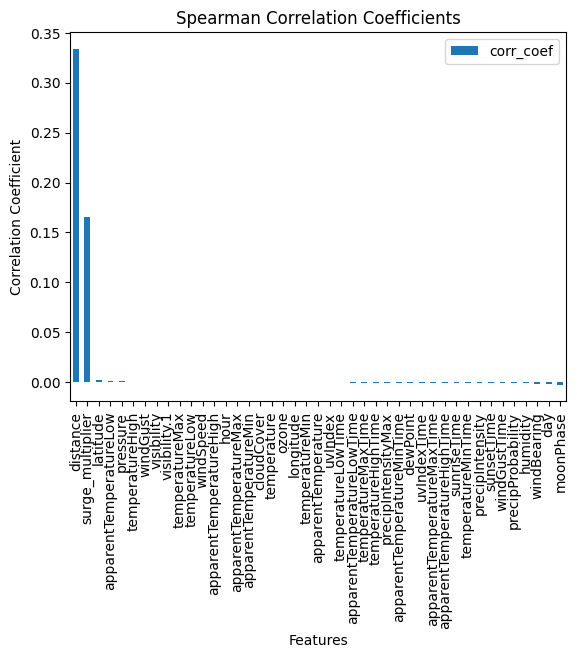

In [ ]:
corr_df.plot(kind='bar')
plt.title('Spearman Correlation Coefficients')
plt.xlabel('Features')
plt.ylabel('Correlation Coefficient')
plt.show()

AS WE CAN SEE DISTANCE, SUREGE MULTIPLIER, LATITUDE, APPARENT TEMPERATURE LOW, PRESSURE AND TEMPERTURE HIGH ARE THE MOST SUITABLE NUMERICAL FEATURES FOR PRICE PREDICTION

In [ ]:
 df_categorical.columns

Index(['month', 'source', 'destination', 'cab_type', 'name', 'short_summary',
       'icon', 'minute'],
      dtype='object')

In [ ]:
df['price'].describe()

count    637976.000000
mean         16.545125
std           9.324359
min           2.500000
25%           9.000000
50%          13.500000
75%          22.500000
max          97.500000
Name: price, dtype: float64

In [ ]:
categories = df_categorical.columns


**CHI2 FOR CATEGORICAL FEATURES**

In [ ]:
import pandas as pd
from scipy.stats import chi2_contingency

# Select the features and target variable
features = df_categorical
target = df['price']

# Initialize empty lists for the chi-square test results and p-values
chi_dict = {}
p_dict = {}

# Loop through each feature and perform the chi-square test
for col in features.columns:
    contingency_table = pd.crosstab(features[col], target)
    chi, pval, dof, expected = chi2_contingency(contingency_table)
    chi_dict[col] = chi
    p_dict[col]=pval
chi_df = pd.DataFrame.from_dict(chi_dict, orient='index', columns=['chi_square'])

# sort the dataframe by chi-square values in descending order
chi_df = chi_df.sort_values(by='chi_square', ascending=False)

# print the sorted chi-square dataframe
print(chi_df)
print('  ')
p_df = pd.DataFrame.from_dict(p_dict, orient='index', columns=['p_value'])
p_df = p_df.sort_values(by='p_value', ascending=False)
print(p_df)

                 chi_square
name           2.331125e+06
cab_type       3.890842e+05
source         9.246860e+04
destination    9.066977e+04
minute         8.408397e+03
short_summary  1.179543e+03
icon           8.142800e+02
month          1.589691e+02
  
                p_value
minute         0.942255
icon           0.932497
short_summary  0.400588
month          0.218778
source         0.000000
destination    0.000000
cab_type       0.000000
name           0.000000


From the above tests, features for our prediction are
* distance
* surge_multiplier
* latitude
* pressure
* apparentTemperatureLow
* temperatureHigh
* short_summary
* month
* source
* destination
* cab_type
* name


In [ ]:
df_modelling = df[['distance', 'surge_multiplier', 'latitude',
'pressure','apparentTemperatureLow',
'temperatureHigh'  ,'month', 'source', 'destination', 'cab_type',
'name', 'short_summary','price']]

#### Encoding of categorical variables
Before performing feature selection we encode categorical data.
For this purpose I will be using target guided encoding which basically means that the numerical value given to a feature will depend on the target(example mean or median(if outliers exist).
Since a lot of outliers exist in our case therfore we will be using median

In [ ]:
for feature in categories:
  median_price = df.groupby(feature)['price'].median().to_dict()
  df_modelling[feature] = df[feature].map(median_price)

<ipython-input-102-c27dc0957964>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-102-c27dc0957964>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-102-c27dc0957964>:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-102-c27

# Modelling
In order to start modelling we will be first normalizing and standardizing our independent variables in the dataset so that it becomes easy for the model to run predictions and saves calculation space

For ML modelling 7 differenrt ML models are used and their accuracies are compared

In [ ]:
x = df_modelling.drop('price',axis = 1)
y = df_modelling['price']

### Standardizing
We will be using scale function from sklearn.preprocessing to standardize data

In [ ]:
x = pd.DataFrame(scale(x))
y = pd.DataFrame(scale(y))
x.head()

0         1         2         3         4         5    6         7   \
0 -1.54064 -0.157905 -2.577771  0.882134 -0.341097 -0.226748  0.0 -2.039995   
1 -1.54064 -0.157905 -2.577771 -0.454359  0.752461  0.376985  0.0 -2.039995   
2 -1.54064 -0.157905 -2.577771 -1.321855 -0.127599  0.418679  0.0 -2.039995   
3 -1.54064 -0.157905 -2.577771  0.269915 -0.488808 -0.001599  0.0 -2.039995   
4 -1.54064 -0.157905 -2.577771 -0.870668  0.018871 -0.476913  0.0 -2.039995   

         8         9         10   11   12        13  
0 -0.502447  1.036986 -1.157672  0.0  0.0 -0.345180  
1 -0.502447  1.036986  0.102702  0.0  0.0 -0.345180  
2 -0.502447  1.036986 -0.892330  0.0  0.0 -0.345180  
3 -0.502447  1.036986  1.893760  0.0  0.0  2.711688  
4 -0.502447  1.036986 -0.295311  0.0  0.0 -0.345180

## Applying ML to our preprocessed dataset

## SGD Regressor

https://towardsdatascience.com/sgdregressor-with-scikit-learn-untaught-lessons-you-need-to-know-cf2430439689


In [ ]:
# Splitting into training and testing data
X_train,X_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state = 12)
# Creating an instance of the model
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, penalty=None, eta0=0.1)

sgd_reg.fit(X_train, y_train)

y_pred = sgd_reg.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error:", mse)

r2 = r2_score(y_test, y_pred)
print('R2 score - ', r2)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Mean squared error: 0.077446562808395
R2 score -  0.9229875328883878


# Lasso Regression
https://towardsdatascience.com/ridge-and-lasso-regression-a-complete-guide-with-python-scikit-learn-e20e34bcbf0b

We will also be comparing lasso regression vs linear regression. Lasso regression with different values of alpha will also be compared

In [ ]:
# lasso001 and lasso0001 represent instances of lasso model with alpha values 0.001 and 0.0001 respectively
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=3)

lasso = Lasso() #This has alpha = 1
lasso.fit(X_train,y_train)
train_score=lasso.score(X_train,y_train)
test_score=lasso.score(X_test,y_test)
coeff_used = np.sum(lasso.coef_!=0)

print("training score:", train_score)
print("test score: ", test_score)
print("number of features used: ", coeff_used)

lasso001 = Lasso(alpha=0.01, max_iter=100000)
lasso001.fit(X_train,y_train)
train_score001=lasso001.score(X_train,y_train)
test_score001=lasso001.score(X_test,y_test)
coeff_used001 = np.sum(lasso001.coef_!=0)

print ("training score for alpha=0.01:", train_score001 )
print ("test score for alpha =0.01: ", test_score001)
print ("number of features used: for alpha =0.01:", coeff_used001)

lasso00001 = Lasso(alpha=0.0001, max_iter=100000)
lasso00001.fit(X_train,y_train)
train_score00001=lasso00001.score(X_train,y_train)
test_score00001=lasso00001.score(X_test,y_test)
coeff_used00001 = np.sum(lasso00001.coef_!=0)

print ("training score for alpha=0.0001:", train_score00001 )
print ("test score for alpha =0.0001: ", test_score00001)
print ("number of features used: for alpha =0.0001:", coeff_used00001)

lr = LinearRegression()
lr.fit(X_train,y_train)
lr_train_score=lr.score(X_train,y_train)
lr_test_score=lr.score(X_test,y_test)
print ("LR training score:", lr_train_score )
print ("LR test score: ", lr_test_score)

training score: 0.0
test score:  -4.653126062148516e-05
number of features used:  0
training score for alpha=0.01: 0.9245552840496631
test score for alpha =0.01:  0.9251256222499437
number of features used: for alpha =0.01: 4
training score for alpha=0.0001: 0.925263210325928
test score for alpha =0.0001:  0.9258424897526181
number of features used: for alpha =0.0001: 11
LR training score: 0.9252633983032151
LR test score:  0.9258426294107442


Clearly alpha = 1 performs a lot of regularization to prevent overfitting that it doesn't even use one of the features , hence we have to use lesser values of alpha in order for this model to work appropriately

### Visualising our model with coefficient index and its magnitude respectively to see which features are given how much importance and also to see the difference in coefficient importance for changing alpha values

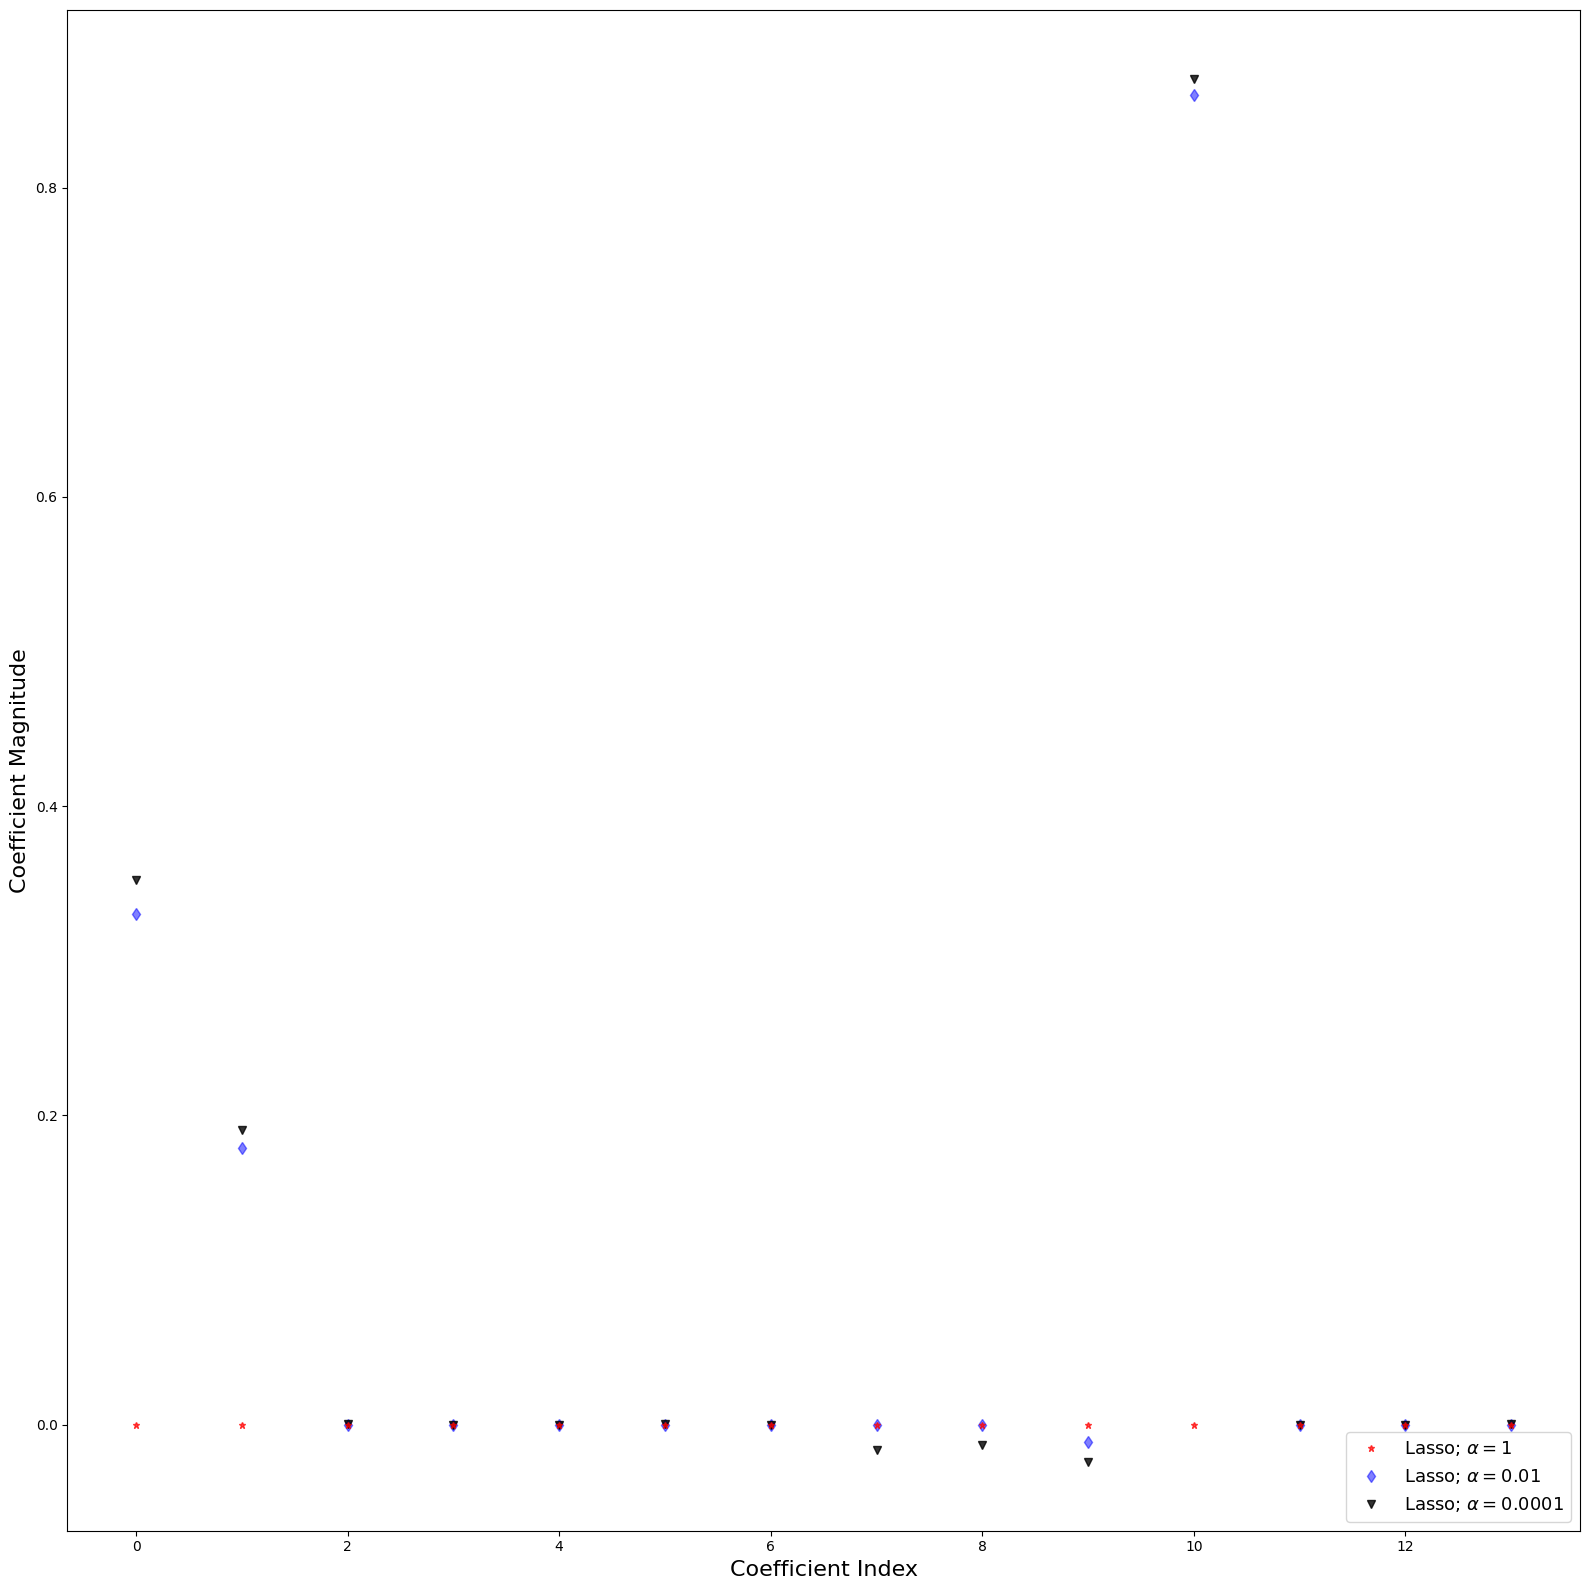

In [ ]:
plt.figure(figsize=(16, 16))

plt.plot(lasso.coef_,alpha=0.7,linestyle='none',marker='*',markersize=5,color='red',label=r'Lasso; $\alpha = 1$',zorder=7) # alpha here is for transparency
plt.plot(lasso001.coef_,alpha=0.5,linestyle='none',marker='d',markersize=6,color='blue',label=r'Lasso; $\alpha = 0.01$') # alpha here is for transparency
plt.plot(lasso00001.coef_,alpha=0.8,linestyle='none',marker='v',markersize=6,color='black',label=r'Lasso; $\alpha = 0.0001$') # alpha here is for transparency

plt.xlabel('Coefficient Index',fontsize=16)
plt.ylabel('Coefficient Magnitude',fontsize=16)
plt.legend(fontsize=13,loc=4)
plt.tight_layout()
plt.show()


# Elastic Net Regressor
https://machinelearningmastery.com/elastic-net-regression-in-python/

First we will perform evaluation on the training dataset of our model and then perform predictions on the test dataset

In [ ]:
# evaluate an elastic net model on the dataset
X_train,X_test,y_train,y_test=train_test_split(x,y, test_size=0.2, random_state=32)

model = ElasticNet(alpha=1.0, l1_ratio=0.5) ## lambda = 1 and alpha = 0.5

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
scores = cross_val_score(model, X_train, y_train, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
scores = absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (mean(scores), std(scores)))

Mean MAE: 0.629 (0.002)


In [ ]:
model = ElasticNet(alpha=1.0, l1_ratio=0.5)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Root mean squared error - ',rmse)
print('R2 score - ', r2)

Root mean squared error -  0.7831711185139474
R2 score -  0.3812222716175493


Since the r2 score is very less we will perform hyperparameter tuning to get the best value of alpha and lambda respectively


The scikit-learn library also provides a built-in version of the algorithm that automatically finds good hyperparameters via the ElasticNetCV class.

In [ ]:
# use automatically configured elastic net algorithm

cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

ratios = arange(0, 1, 0.01)
alphas = [1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 0.0, 1.0, 10.0, 100.0]
model = ElasticNetCV(l1_ratio=ratios, alphas=alphas, cv=cv, n_jobs=-1)

model.fit(x, y);
print('alpha: %f' % model.alpha_)
print('l1_ratio_: %f' % model.l1_ratio_)

Streaming output truncated to the last 5000 lines.
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 21422.5997907453, tolerance: 57.40859712397829

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set l1_ratio > 0 to add L1 regularization.

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: ConvergenceWarning:

Objective did not converge. You might want to increase the number of iterations. Duality gap: 21488.3834193605, tolerance: 57.51076750634131

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:617: UserWarning:

Coordinate descent without L1 regularization may lead to unexpected results and is discouraged. Set

alpha: 0.000100
l1_ratio_: 0.990000


Using the tuned values of hyperparameters alpha and lambda in the actual model boosts up the accuracy

In [ ]:
# alpha: 0.000100
# l1_ratio_: 0.880000

model = ElasticNet(alpha=0.000100, l1_ratio=0.880000)
model.fit(X_train,y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print('Root mean squared error - ',rmse)
print('R2 score - ', r2)

Root mean squared error -  0.27375197962746767
R2 score -  0.9243975475017498


### **LINEAR REGRESSION**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

lr = LinearRegression()
lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

r2 = r2_score(y_test, y_pred)
print("R-squared score: ", r2)

R-squared score:  0.9255118789662787


In [ ]:
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error: ",mse )

Mean squared error:  0.07469107958549008


### **DECISION TREE**

In [ ]:
reg = DecisionTreeRegressor(criterion="squared_error",max_depth=10,min_samples_split= 10,
random_state=0)

reg.fit(X_train,y_train)

y_pred = reg.predict (X_test)
y_pred

array([-0.89170142, -0.64203908, -0.99431546, ..., -0.01425853,
       -0.80599039, -0.5195177 ])

In [ ]:
mse=mean_squared_error(y_test,y_pred)
print("Mean squared error: ",mse )

r2 = r2_score(y_test, y_pred)
print("R-squared score: ", r2)

Mean squared error:  0.03493449516034717
R-squared score:  0.965160432568424


### **RANDOM FOREST**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

rf = RandomForestRegressor(n_estimators=100, random_state=42)

rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
print("Mean squared error: ", mse)

r2 = r2_score(y_test, y_pred)
print('R2 score - ', r2)

<ipython-input-126-754827d96ce9>:5: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().



Mean squared error:  0.03771668633481727
R2 score -  0.9623858014599571


### **Gradient Boosting Regressor**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


gb_reg = GradientBoostingRegressor( learning_rate=0.1, n_estimators=100, max_depth=3)
gb_reg.fit(X_train, y_train)


y_pred = gb_reg.predict(X_test)


rmse = mean_squared_error(y_test, y_pred, squared=False)
print("Root Mean Squared Error:", rmse)

r2 = r2_score(y_test, y_pred)
print("R-squared score: ", r2)

/usr/local/lib/python3.10/dist-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().



Root Mean Squared Error: 0.18997219400950172
R-squared score:  0.9640086315560873


Scatter plot between y test and y pred for gradient boosting

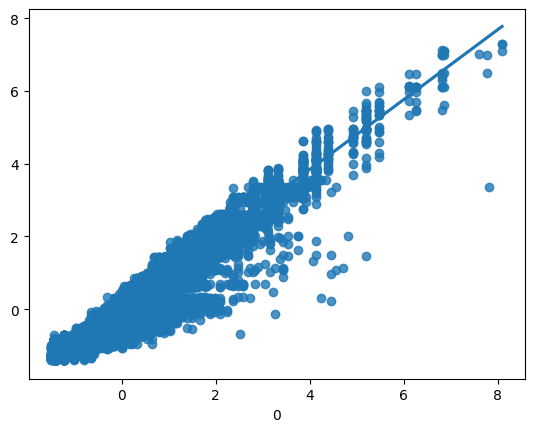

In [ ]:

sns.regplot(x=y_test,y=y_pred );